# Evaluate with Special Cases

We are trying to pick up a Typhoon case in 2016 to illustrate the hour-by-hour QPE results. First we read in the typhoon information.

In [1]:
# Load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xpath = '../data/qpesums_encoded'
ypath = '../examples/data/t1hr.csv'
tyfile = '../examples/data/2013-2016_TYW.xlsx'

tyinfo = pd.read_excel(tyfile)
print(tyinfo.shape)
print(tyinfo.tail())

(20, 4)
   start_date   end_date name_zhtw      name
15 2016-07-06 2016-07-09       尼伯特  NEPARTAK
16 2016-09-12 2016-09-15       莫蘭蒂   MERANTI
17 2016-09-15 2016-09-18       馬勒卡   MALAKAS
18 2016-09-25 2016-09-28        梅姬      MEGI
19 2016-10-05 2016-10-06        艾利      AERE


Next, we read in the precipitation data, and select the time-stamp between 2016-07-06:00:00 ~ 2016-10-06:23:00. We try to plot the precipitation and see which typhoon/station to illustrate.

In [2]:
# Load Precipitations
ys = pd.read_csv(ypath)
print(ys.shape)

# Pick date for 2016 Typhoon Warnings
ty16idx = (ys.date>=2016070600)&(ys.date<=2016100623)
ys_ty2016 = ys.loc[ty16idx,:]
print(ys_ty2016.shape)
print(ys_ty2016.head())

# Parameters
stdids = ['466880', '466910', '466920', '466930', '466940', 
          'C0A520', 'C0A530', 'C0A540', 'C0A550', 'C0A560', 
          'C0A570', 'C0A580', 'C0A640', 'C0A650', 'C0A660', 
          'C0A710', 'C0A860', 'C0A870', 'C0A880', 'C0A890', 
          'C0A920', 'C0A940', 'C0A950', 'C0A970', 'C0A980', 
          'C0A9A0', 'C0A9B0', 'C0A9C0', 'C0A9E0', 'C0A9F0', 
          'C0A9G0', 'C0A9I1', 'C0AC40', 'C0AC60', 'C0AC70', 
          'C0AC80', 'C0ACA0', 'C0AD00', 'C0AD10', 'C0AD20', 
          'C0AD30', 'C0AD40', 'C0AD50', 'C0AG90', 'C0AH00']

(35064, 46)
(2231, 46)
             date  C0A580  C0A970  466940  C0A540  C0A550  C0A9A0  C0AC60  \
30768  2016070601     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30769  2016070602     0.0     0.0     0.0     0.5     0.0     0.0     0.0   
30770  2016070603     0.0     0.0     0.0     0.0     0.0     0.0     NaN   
30771  2016070604     0.0     0.0     0.0     0.0     NaN     0.0     0.0   
30772  2016070605     0.0     0.0     0.0     NaN     0.0     0.0     NaN   

       C0A870  466920  ...  C0A9I1  C0AD50  C0A9B0  C0A560  C0A950  C0A940  \
30768     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
30769     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
30770     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
30771     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     NaN   
30772     0.0     0.0  ...     0.0     0.0     0.0     0.0     NaN     NaN   

       C0A570  C0A980  C0A9C0  C0AD40  
30768

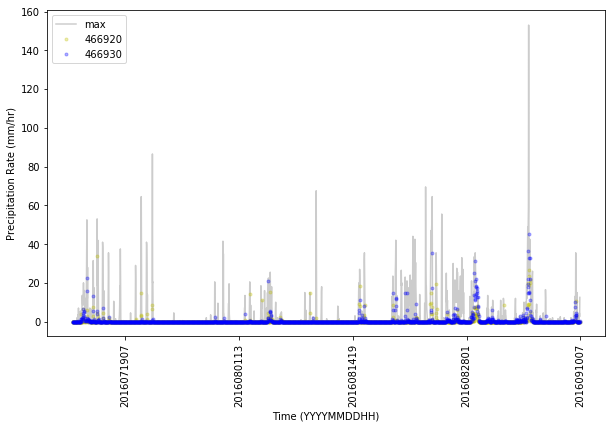

In [3]:
# Plot the precipitation of 2016 Typhoon seasons
# Max precipitation
ymax = ys_ty2016.iloc[:,1:].max(axis=1)
# Dates, locations, and labels
plt.figure(figsize=(10,6))
dates = ys_ty2016['date']
plt.plot(ymax, 'k-', alpha=0.2, label='max')
# Dates, locations, and labels
loc, lab = plt.xticks()
newlab = list(dates.iloc[np.arange(0, len(ymax), int(len(ymax)/len(loc)))])
plt.xticks(loc, newlab, rotation='vertical')
# For stations
plt.plot(ys_ty2016['466920'], 'y.', alpha=0.3, label='466920')
plt.plot(ys_ty2016['466930'], 'b.', alpha=0.3, label='466930')
#plt.plot(ys_ty2016['C0A920'], 'r.', alpha=0.5, label='C0A920')
plt.ylabel('Precipitation Rate (mm/hr)')
plt.xlabel('Time (YYYYMMDDHH)')
plt.legend()
plt.show()

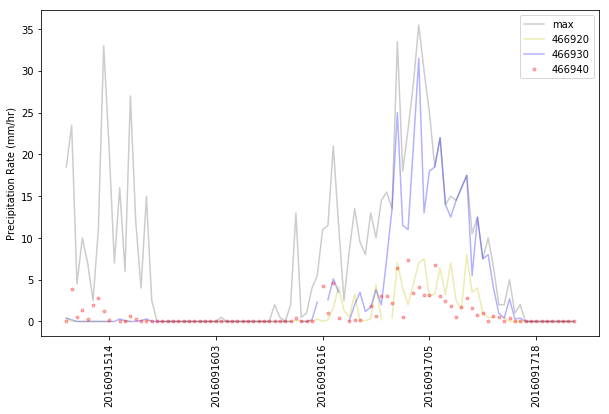

In [4]:
# Pick date for 2016 Typhoon Warnings
selidx = (ys.date>=2016091500)&(ys.date<=2016091824)
yselected = ys.loc[selidx,:]
# Plot the precipitation of 2016 Typhoon seasons
# Max precipitation
ymax = yselected.iloc[:,1:].max(axis=1)
# Dates, locations, and labels
plt.figure(figsize=(10,6))
dates = yselected['date']
plt.plot(ymax, 'k-', alpha=0.2, label='max')
# Dates, locations, and labels
loc, lab = plt.xticks()
newlab = list(dates.iloc[np.arange(0, len(ymax), int(len(ymax)/len(loc)))])
plt.xticks(loc, newlab, rotation='vertical')
# For stations
plt.plot(yselected['466920'], 'y-', alpha=0.3, label='466920')
plt.plot(yselected['466930'], 'b-', alpha=0.3, label='466930')
plt.plot(yselected['466940'], 'r.', alpha=0.3, label='466940')
plt.ylabel('Precipitation Rate (mm/hr)')
plt.legend()
plt.show()

So, after investigation, we picked typhoon Malakas in 2016 (CWB typhoon warning period: 2016-09-15 ~ 2016-09-18). Also, we will look at CWB station 466920 (Taipei) and 466930 (Zhuzihu), with smaller and larger precipitation records, respectively.

# Load Precipitation data

In [5]:
import numpy as np
import pandas as pd
import os, logging

xpath = '../data/qpesums_encoded'
ypath = '../examples/data/t1hr.csv'

logging.basicConfig(level=logging.INFO)

# Load input/output data for model
def loadIOTab(srcx, srcy, dropna=False):
    import pandas as pd
    import os
    # Read raw input and output
    #logging.info("Reading input X from: "+ srcx)
    logging.info("Reading input X from: "+ srcx)
    xfiles = []
    for root, dirs, files in os.walk(srcx): 
        for fn in files: 
            if fn.endswith('.npy'): 
                 xfiles.append({'date':fn.replace('.enc.npy',''), 'xuri':os.path.join(root, fn)})
    xfiles = pd.DataFrame(xfiles)
    logging.info("... read input size: "+str(xfiles.shape))
    #logging.info("Reading output Y from: "+ srcy)
    logging.info("Reading output Y from: "+ srcy)
    yraw = pd.read_csv(srcy, encoding='utf-8')
    yraw['date'] = yraw['date'].apply(str)
    logging.info("... read output size: "+str(yraw.shape))
    # Create complete IO-data
    logging.info("Pairing X-Y and splitting training/testing data.")
    iotab = pd.merge(yraw, xfiles, on='date', sort=True)
    logging.info("... data size after merging: "+str(iotab.shape))
    # Dro NA if specified
    if dropna:
        logging.info('Dropping records with NA')
        iotab = iotab.dropna()
        logging.info("... data size after dropping-NAs: "+str(iotab.shape))
    # Done
    return(iotab)

# Scan for input/output
iotab = loadIOTab(xpath, ypath)
#iotab = iotab.loc[:,['date','t1hr','xuri']].dropna()
print(iotab.head())



INFO:root:Reading input X from: ../data/qpesums_encoded
INFO:root:... read input size: (34402, 2)
INFO:root:Reading output Y from: ../examples/data/t1hr.csv
INFO:root:... read output size: (35064, 46)
INFO:root:Pairing X-Y and splitting training/testing data.
INFO:root:... data size after merging: (32953, 47)


         date  C0A580  C0A970  466940  C0A540  C0A550  C0A9A0  C0AC60  C0A870  \
0  2013010109     0.0     0.5     0.5     0.0     0.0     0.0     0.0     0.5   
1  2013010110     0.5     1.5     1.0     0.5     0.5     0.0     0.0     0.5   
2  2013010111     0.5     1.0     0.5     1.0     1.5     0.0     0.5     0.5   
3  2013010112     0.5     4.0     1.0     1.5     1.5     1.0     0.5     0.5   
4  2013010113     0.5     6.0     1.0     0.0     1.5     0.5     0.5     1.0   

   466920  ...  C0AD50  C0A9B0  C0A560  C0A950  C0A940  C0A570  C0A980  \
0     NaN  ...     0.0     0.0     0.5     0.0     0.5     0.0     0.0   
1     0.5  ...     0.0     0.5     1.5     0.5     0.5     1.0     0.5   
2     NaN  ...     0.0     0.0     0.5     0.0     1.5     1.0     0.0   
3     1.5  ...     0.5     0.0     0.0     1.0     2.5     0.5     0.5   
4     1.0  ...     0.5     1.0     0.0     1.5     3.0     0.5     1.0   

   C0A9C0  C0AD40                                        xuri  
0   

# Load CWB QPE Data

In [6]:
cwb = pd.read_csv('../ws.cwb/cwbqpe_eval.csv')
cwb = cwb.loc[:,['timestamp']+stdids]

cwb['date'] = cwb['timestamp'].apply(lambda x: int(x/100))
cwb.head()

,timestamp,466880,466910,466920,466930,466940,C0A520,C0A530,C0A540,C0A550,...,C0ACA0,C0AD00,C0AD10,C0AD20,C0AD30,C0AD40,C0AD50,C0AG90,C0AH00,date
0,201401010800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014010108
1,201401010900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014010109
2,201401011000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014010110
3,201401011100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014010111
4,201401011200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014010112


# Load Input Data (encoded QPESUMS)

In [7]:
# Load input data
x = np.load('../examples/data/encqpesums.npy')
x_full = pd.DataFrame(np.array(x))
x_full.index = list(iotab['date'])
print(x_full.shape)
print(iotab.shape)

(32953, 64)
(32953, 47)


In [8]:
# Split training and testing data
idxtrain = (iotab['date'].astype(int)<2016010100)
idxtest = (iotab['date'].astype(int)>=2016010100)
idxty = (iotab['date'].astype(int)>=2016091500)&(iotab['date'].astype(int)<=2016091823)
print(sum(idxtrain))
print(sum(idxtest))
print(sum(idxtrain)+sum(idxtest))
print(sum(idxty))

24969
7984
32953
91


# Define utility functions

In [11]:
from sklearn import linear_model
# Function to give report for binary classifications
def evaluate_binary(yt, yp, stid=None, ythresh=30.):
    from sklearn.metrics import confusion_matrix
    ytb = (yt>=ythresh)*1
    ypb = (yp>=ythresh)*1
    # Derive metrics
    output = {'id':stid}
    TN, FP, FN, TP = confusion_matrix(ytb, ypb).ravel()
    output['true_positive'] = np.round(TP,2)
    output['false_positive'] = np.round(FP,2)
    output['false_negative'] = np.round(FN,2)
    output['true_negative'] = np.round(TN,2)
    output['sensitivity'] = np.round(TP/(TP+FN),2)
    output['specificity'] = np.round(TN/(FP+TN),2)
    output['prevalence'] = np.round((TP+FN)/(FN+TP+FP+TN),8)
    output['ppv'] = np.round(TP/(TP+FP),4)
    output['npv'] = np.round(TN/(TN+FN),4)
    output['fpr'] = np.round(FP/(FP+TN),4)
    output['fnr'] = np.round(FN/(FN+TP),4)
    output['fdr'] = np.round(FP/(FP+TP),4)
    output['FOR'] = np.round(FN/(TN+FN),4)
    output['accuracy'] = np.round((TP+TN)/(FN+TP+FP+TN),4)
    output['F1'] = np.round(2*TP/(2*TP+FP+FN),4)
    output['MCC'] = np.round((TP*TN-FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),4)
    output['informedness'] = np.round(output['sensitivity'] + output['specificity'] - 1,4)
    output['markedness'] = np.round(output['ppv'] + output['npv'] -1,4)
    return(output)

# Function to give report for regression
def evaluate_regression(y_true, y_pred, stid=None):
    import sklearn.metrics as metrics
    # Calculate measures
    results = {'id':stid}
    results['y_true_mean'] = y_true.mean()
    results['y_true_var'] = y_true.var()
    results['y_pred_mean'] = y_pred.mean()
    results['y_pred_var'] = y_pred.var()
    results['rmse'] = np.sqrt(metrics.mean_squared_error(y_true,y_pred))
    if y_pred.var()<=10e-8:
        results['corr'] = 0
    else:
        results['corr'] = np.corrcoef(y_true,y_pred)[0,1]
    # Return results
    return(results)

def y_to_log(y):
    ''' Convert the y to log(y+1). '''
    ylog = np.log(y+1).astype(np.float32)
    return(ylog)

def log_to_y(y):
    ''' Convert the predicted y in log-scale back to original scale. '''
    yori = (np.exp(y.flatten())-1.0).astype(np.float32)
    yori[yori<0.5] = 0.                          # Set the minimal values to 0.
    return(yori)


# Plot QPE
def plot_test(yt, yp, cwb, xlab, stid):
    import matplotlib.pyplot as plt
    # Show time series
    plt.figure(figsize=(10,6))
    plt.plot(yt, ls='-', c='black', alpha=0.6, label='measured')
    plt.plot(cwb, ls='-.', c='orange', alpha=0.8, label='CWB')
    plt.plot(yp, ls='--', c='blue', alpha=0.8, label='VTP')
    plt.xticks(np.arange(0, len(xlab), int(len(xlab)/12)), xlab[np.arange(0, len(xlab), int(len(xlab)/12))], rotation='vertical')
    plt.ylim(0,50)
    plt.ylabel('Precipitation Rate (mm/hr)')
    plt.title(stid)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return(0)


# Evaluate one station
def evaluate_onestation(sid, iotab, x_full, cwb, yth=0.1, ts0=2016091500, ts1=2016091824):
    # Create io-data
    stdio = iotab.loc[:,['date', sid]].merge(x_full, left_on='date', right_index=True).dropna().reset_index(drop=True)
    y = stdio[sid]
    x = stdio.iloc[:, 2:]
    # Merge CWB QPE
    cwbsub = cwb.loc[:,['date', sid]]
    cwbsub['date'] = cwbsub['date'].astype('str')
    y_cwb = stdio.loc[:,['date']].merge(cwbsub, on='date').reset_index(drop=True)
    logging.info('CWB data size:'+str(y_cwb.shape))
    # Split training and testing data
    idxtrain = (stdio['date'].astype(int)<2016010100)
    idxtest = (stdio['date'].astype(int)>=2016010100)
    idxty = (stdio['date'].astype(int)>=ts0)&(stdio['date'].astype(int)<=ts1)
    #print(sum(idxtrain))
    #print(sum(idxtest))
    #print(sum(idxtrain)+sum(idxtest))
    #print(sum(idxty))
    y_train = y.loc[idxtrain]
    x_train = x.loc[idxtrain,:]
    # Apply filter on training data
    idx_filtered = y_train>=yth
    logging.info('    Filter y: '+str(yth))
    y_train = y_train.loc[idx_filtered]
    x_train = x_train.loc[idx_filtered,:]
    # Reporting training/testing size
    logging.info('    Data dimension of training data: '+str(x_train.shape[0]) + ', ' +str(x_train.shape[1]))
    y_test = y.loc[idxty].reset_index(drop=True)
    x_test = x.loc[idxty,:].reset_index(drop=True)
    logging.info('    Data dimension of testing data: '+str(x_test.shape[0]) + ', ' +str(x_test.shape[1]))
    cwb_test = y_cwb.loc[(y_cwb['date'].astype(int)>=ts0)&(y_cwb['date'].astype(int)<=ts1), :].reset_index(drop=True)
    logging.info('CWB data size for evaluation:'+str(cwb_test.shape))
    # Train model and test
    reg = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet', alpha=0.0001, l1_ratio=0.25)
    reg.fit(x_train, y_to_log(y_train))
    yp_train = reg.predict(x_train)
    yp_test = reg.predict(x_test)
    # Evaluate
    evtrain = evaluate_regression(y_train, log_to_y(yp_train), stid=sid)
    logging.info(evtrain)
    evtest = evaluate_regression(y_test, log_to_y(yp_test), stid=sid)
    logging.info(evtest)
    #evcwb = evaluate_regression(y_test, cwb_test[sid], stid=sid)
    #logging.info(evcwb)
    # Making plot
    plot_test(y_test, log_to_y(yp_test), cwb_test[sid], cwb_test['date'], sid)
    #
    return(0)

INFO:root:CWB data size:(22696, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1350, 64
INFO:root:    Data dimension of testing data: 75, 64
INFO:root:CWB data size for evaluation:(75, 2)
INFO:root:{'id': '466920', 'y_true_mean': 4.7622962962963, 'y_true_var': 50.87330680613877, 'y_pred_mean': 3.1322837, 'y_pred_var': 3.7850556, 'rmse': 6.280109484725246, 'corr': 0.6429721007137099}
INFO:root:{'id': '466920', 'y_true_mean': 2.5386666666666664, 'y_true_var': 37.09429549549547, 'y_pred_mean': 2.4643636, 'y_pred_var': 4.7343802, 'rmse': 4.562416550367067, 'corr': 0.7795802718857977}


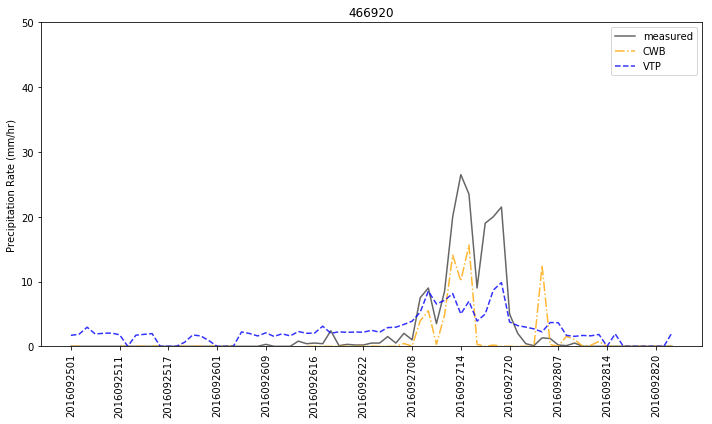

0

In [12]:
#sid='466920'
#ts0=2016091500
#ts1=2016091824
#cwbsub = cwb.loc[:,['date', sid]]
#cwbsub['date'] = cwbsub['date'].astype('str')
#y_cwb = stdio.loc[:,['date']].merge(cwbsub, on='date').reset_index(drop=True)
#print(y_cwb.shape)
#cwb_test = y_cwb.loc[(y_cwb['date'].astype(int)>=ts0)&(y_cwb['date'].astype(int)<=ts1), :].reset_index(drop=True)
#print(cwb_test.shape)
evaluate_onestation('466920', iotab, x_full, cwb, yth=1.0,ts0=2016092500, ts1=2016092824)

INFO:root:CWB data size:(23490, 2)
INFO:root:    Filter y: 3.0
INFO:root:    Data dimension of training data: 847, 64
INFO:root:    Data dimension of testing data: 83, 64
INFO:root:CWB data size for evaluation:(83, 2)
INFO:root:{'id': '466930', 'y_true_mean': 8.054663518299884, 'y_true_var': 73.22650009350205, 'y_pred_mean': 6.3641686, 'y_pred_var': 22.45481, 'rmse': 6.634383370153687, 'corr': 0.671640011433417}
INFO:root:{'id': '466930', 'y_true_mean': 4.216867469879519, 'y_true_var': 82.16556567734347, 'y_pred_mean': 5.1604333, 'y_pred_var': 28.888872, 'rmse': 5.169837059460945, 'corr': 0.8696535899831765}


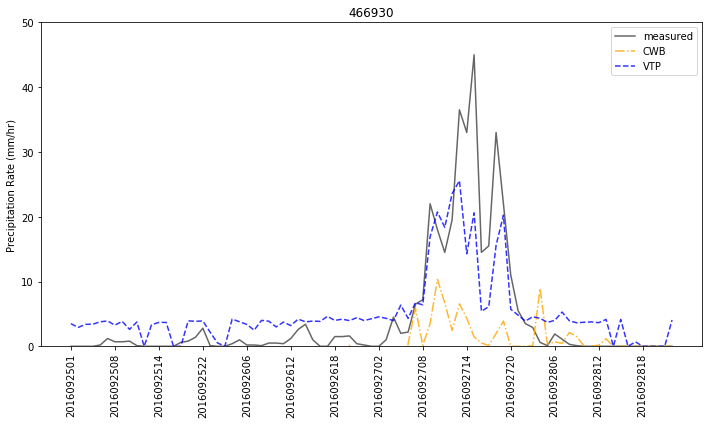

0

In [13]:
evaluate_onestation('466930', iotab, x_full, cwb, yth=3.0,ts0=2016092500, ts1=2016092824)

INFO:root:CWB data size:(22683, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1458, 64
INFO:root:    Data dimension of testing data: 78, 64
INFO:root:CWB data size for evaluation:(78, 2)
INFO:root:{'id': '466880', 'y_true_mean': 4.311042524005487, 'y_true_var': 40.209548534909935, 'y_pred_mean': 3.7134178, 'y_pred_var': 12.292337, 'rmse': 5.1361175857539765, 'corr': 0.5951024080769085}
INFO:root:{'id': '466880', 'y_true_mean': 1.9038461538461537, 'y_true_var': 22.682192807192795, 'y_pred_mean': 2.68375, 'y_pred_var': 8.91483, 'rmse': 3.249253937200504, 'corr': 0.7558046471199952}


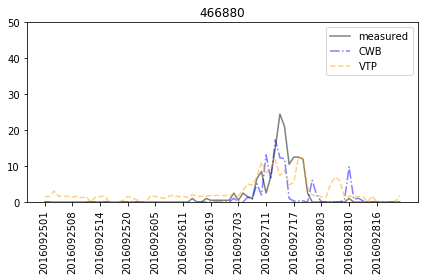

INFO:root:CWB data size:(22664, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2905, 64
INFO:root:    Data dimension of testing data: 73, 64
INFO:root:CWB data size for evaluation:(73, 2)
INFO:root:{'id': '466910', 'y_true_mean': 3.8186230636833023, 'y_true_var': 34.54380939815958, 'y_pred_mean': 3.001055, 'y_pred_var': 3.621025, 'rmse': 5.109479711193663, 'corr': 0.5685201265233245}
INFO:root:{'id': '466910', 'y_true_mean': 3.5780821917808217, 'y_true_var': 54.28562404870623, 'y_pred_mean': 3.0416286, 'y_pred_var': 5.578359, 'rmse': 5.793376991915891, 'corr': 0.7477295770646203}


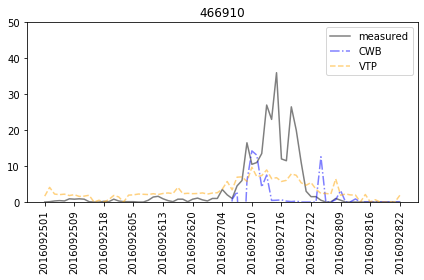

INFO:root:CWB data size:(22696, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1350, 64
INFO:root:    Data dimension of testing data: 75, 64
INFO:root:CWB data size for evaluation:(75, 2)
INFO:root:{'id': '466920', 'y_true_mean': 4.7622962962963, 'y_true_var': 50.87330680613877, 'y_pred_mean': 4.186043, 'y_pred_var': 18.281208, 'rmse': 5.436001940296467, 'corr': 0.6543997494034992}
INFO:root:{'id': '466920', 'y_true_mean': 2.5386666666666664, 'y_true_var': 37.09429549549547, 'y_pred_mean': 3.1111689, 'y_pred_var': 14.250283, 'rmse': 3.8293479302495603, 'corr': 0.799423640723646}


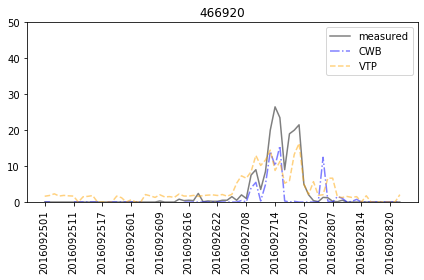

INFO:root:CWB data size:(23490, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2488, 64
INFO:root:    Data dimension of testing data: 83, 64
INFO:root:CWB data size for evaluation:(83, 2)
INFO:root:{'id': '466930', 'y_true_mean': 3.735771704180065, 'y_true_var': 34.723721881112844, 'y_pred_mean': 2.9810822, 'y_pred_var': 6.2441063, 'rmse': 4.748253778344673, 'corr': 0.6445377348067224}
INFO:root:{'id': '466930', 'y_true_mean': 4.216867469879519, 'y_true_var': 82.16556567734347, 'y_pred_mean': 3.2754915, 'y_pred_var': 14.016076, 'rmse': 6.15733060737467, 'corr': 0.8621978353229619}


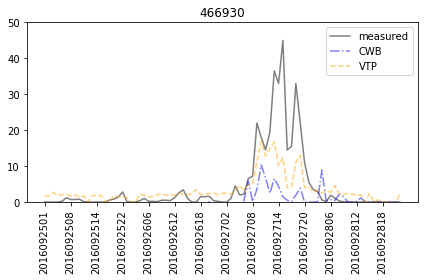

INFO:root:CWB data size:(22969, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2201, 64
INFO:root:    Data dimension of testing data: 81, 64
INFO:root:CWB data size for evaluation:(81, 2)
INFO:root:{'id': '466940', 'y_true_mean': 3.7394820536119915, 'y_true_var': 26.59759045888218, 'y_pred_mean': 3.1645925, 'y_pred_var': 5.1145134, 'rmse': 4.368097872984187, 'corr': 0.5552942125026389}
INFO:root:{'id': '466940', 'y_true_mean': 2.7765432098765435, 'y_true_var': 46.82606790123459, 'y_pred_mean': 2.933641, 'y_pred_var': 6.169813, 'rmse': 5.437708974628547, 'corr': 0.6770576585785963}


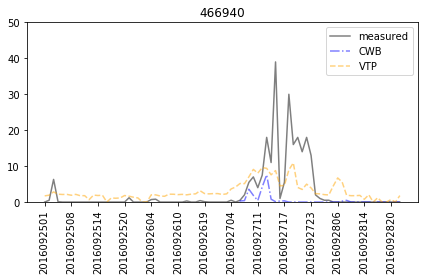

INFO:root:CWB data size:(22370, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1415, 64
INFO:root:    Data dimension of testing data: 87, 64
INFO:root:CWB data size for evaluation:(87, 2)
INFO:root:{'id': 'C0A520', 'y_true_mean': 4.162897526501767, 'y_true_var': 31.96478226318338, 'y_pred_mean': 2.6612601, 'y_pred_var': 1.2807517, 'rmse': 5.3202300076277265, 'corr': 0.5607337378915341}
INFO:root:{'id': 'C0A520', 'y_true_mean': 1.1379310344827587, 'y_true_var': 7.480753809141948, 'y_pred_mean': 2.0605886, 'y_pred_var': 1.468186, 'rmse': 2.4551163292817804, 'corr': 0.5594350803498939}


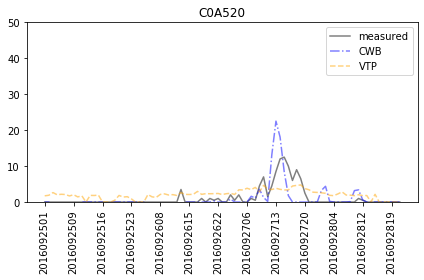

INFO:root:CWB data size:(23866, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2091, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A530', 'y_true_mean': 4.314203730272597, 'y_true_var': 44.07275988000533, 'y_pred_mean': 2.9307544, 'y_pred_var': 3.5815563, 'rmse': 5.865985732825787, 'corr': 0.6025646408288405}
INFO:root:{'id': 'C0A530', 'y_true_mean': 4.105555555555555, 'y_true_var': 60.32300249687894, 'y_pred_mean': 2.552827, 'y_pred_var': 5.144323, 'rmse': 6.139874720278266, 'corr': 0.8422858736531414}


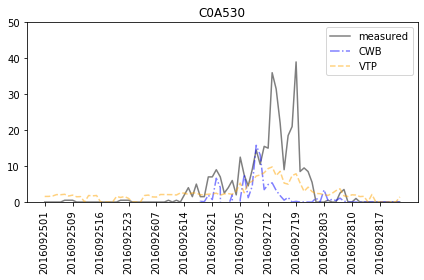

INFO:root:CWB data size:(23648, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2393, 64
INFO:root:    Data dimension of testing data: 86, 64
INFO:root:CWB data size for evaluation:(86, 2)
INFO:root:{'id': 'C0A540', 'y_true_mean': 4.1648558295027165, 'y_true_var': 42.95054948798515, 'y_pred_mean': 3.1043437, 'y_pred_var': 7.836873, 'rmse': 5.360289706121775, 'corr': 0.6313509387748228}
INFO:root:{'id': 'C0A540', 'y_true_mean': 4.784883720930233, 'y_true_var': 96.1443570451436, 'y_pred_mean': 3.204468, 'y_pred_var': 13.671925, 'rmse': 6.9771992774569, 'corr': 0.867192199021044}


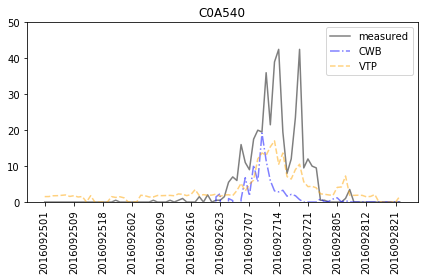

INFO:root:CWB data size:(23764, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 3625, 64
INFO:root:    Data dimension of testing data: 88, 64
INFO:root:CWB data size for evaluation:(88, 2)
INFO:root:{'id': 'C0A550', 'y_true_mean': 3.4002758620689657, 'y_true_var': 21.605877407322783, 'y_pred_mean': 2.6088948, 'y_pred_var': 3.7933125, 'rmse': 3.826376659245503, 'corr': 0.6285128309348013}
INFO:root:{'id': 'C0A550', 'y_true_mean': 2.7386363636363638, 'y_true_var': 30.95389237199583, 'y_pred_mean': 2.8900905, 'y_pred_var': 8.469191, 'rmse': 3.720031598311496, 'corr': 0.7843889279645376}


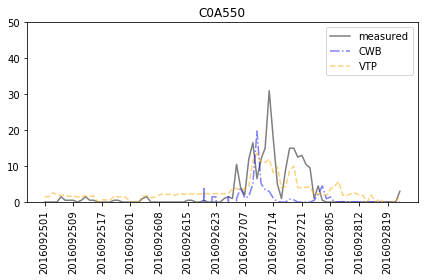

INFO:root:CWB data size:(23352, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1908, 64
INFO:root:    Data dimension of testing data: 84, 64
INFO:root:CWB data size for evaluation:(84, 2)
INFO:root:{'id': 'C0A560', 'y_true_mean': 4.878930817610063, 'y_true_var': 68.53777295168798, 'y_pred_mean': 3.4075842, 'y_pred_var': 7.6346755, 'rmse': 7.0713215241037535, 'corr': 0.6186944814510268}
INFO:root:{'id': 'C0A560', 'y_true_mean': 6.214285714285714, 'y_true_var': 179.7125645438899, 'y_pred_mean': 3.3199573, 'y_pred_var': 11.7265625, 'rmse': 10.879309616192225, 'corr': 0.8690900304723118}


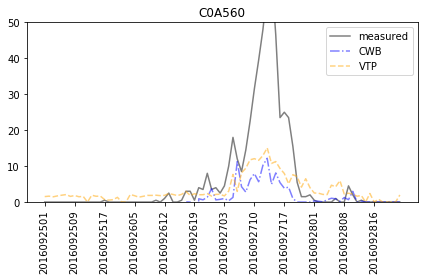

INFO:root:CWB data size:(23293, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2381, 64
INFO:root:    Data dimension of testing data: 86, 64
INFO:root:CWB data size for evaluation:(86, 2)
INFO:root:{'id': 'C0A570', 'y_true_mean': 4.262284754304914, 'y_true_var': 45.792837466780455, 'y_pred_mean': 3.1922643, 'y_pred_var': 7.0803595, 'rmse': 5.583320797808134, 'corr': 0.6339483564915593}
INFO:root:{'id': 'C0A570', 'y_true_mean': 4.97093023255814, 'y_true_var': 93.8962038303694, 'y_pred_mean': 3.100214, 'y_pred_var': 10.577311, 'rmse': 7.170223360493404, 'corr': 0.8852171721795083}


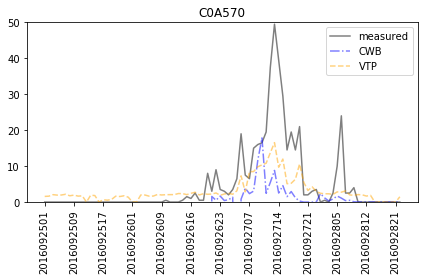

INFO:root:CWB data size:(23330, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2054, 64
INFO:root:    Data dimension of testing data: 85, 64
INFO:root:CWB data size for evaluation:(85, 2)
INFO:root:{'id': 'C0A580', 'y_true_mean': 4.486611489776047, 'y_true_var': 45.23009343203524, 'y_pred_mean': 3.9943874, 'y_pred_var': 15.218133, 'rmse': 5.3369080233980535, 'corr': 0.6135458473873396}
INFO:root:{'id': 'C0A580', 'y_true_mean': 4.6, 'y_true_var': 76.12976190476188, 'y_pred_mean': 3.2335384, 'y_pred_var': 11.047568, 'rmse': 6.165284604292528, 'corr': 0.8695562628722852}


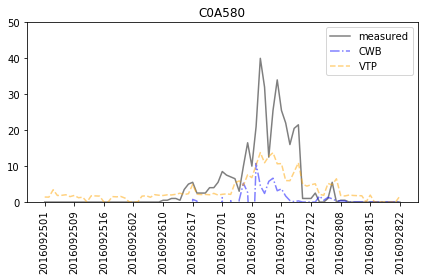

INFO:root:CWB data size:(23089, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2154, 64
INFO:root:    Data dimension of testing data: 83, 64
INFO:root:CWB data size for evaluation:(83, 2)
INFO:root:{'id': 'C0A640', 'y_true_mean': 4.370009285051068, 'y_true_var': 40.599676079802016, 'y_pred_mean': 3.485668, 'y_pred_var': 13.940175, 'rmse': 4.950340859815928, 'corr': 0.6474205785910951}
INFO:root:{'id': 'C0A640', 'y_true_mean': 5.036144578313253, 'y_true_var': 73.63892153981783, 'y_pred_mean': 3.240117, 'y_pred_var': 15.571964, 'rmse': 5.819604001386681, 'corr': 0.8568681021366346}


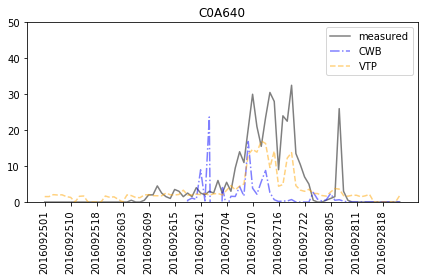

INFO:root:CWB data size:(23244, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2740, 64
INFO:root:    Data dimension of testing data: 42, 64
INFO:root:CWB data size for evaluation:(42, 2)
INFO:root:{'id': 'C0A650', 'y_true_mean': 3.870255474452555, 'y_true_var': 32.48087835749119, 'y_pred_mean': 3.100666, 'y_pred_var': 4.5427146, 'rmse': 4.751565186940468, 'corr': 0.6186419821449285}
INFO:root:{'id': 'C0A650', 'y_true_mean': 0.7976190476190477, 'y_true_var': 3.87877468060395, 'y_pred_mean': 1.5227154, 'y_pred_var': 0.91913986, 'rmse': 1.833718185559924, 'corr': 0.5008741662957559}


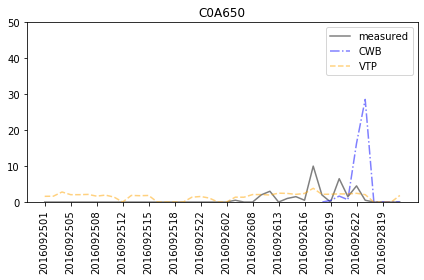

INFO:root:CWB data size:(23885, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 3075, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A660', 'y_true_mean': 3.6765853658536587, 'y_true_var': 27.452216703428803, 'y_pred_mean': 2.6407878, 'y_pred_var': 1.2675719, 'rmse': 4.847026988792944, 'corr': 0.5332377554327575}
INFO:root:{'id': 'C0A660', 'y_true_mean': 2.3222222222222224, 'y_true_var': 36.45118601747815, 'y_pred_mean': 2.6739912, 'y_pred_var': 1.525215, 'rmse': 5.169806271483446, 'corr': 0.7396249051436772}


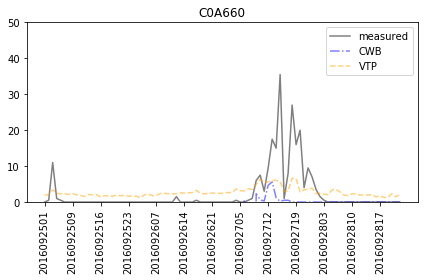

INFO:root:CWB data size:(21126, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1424, 64
INFO:root:    Data dimension of testing data: 85, 64
INFO:root:CWB data size for evaluation:(85, 2)
INFO:root:{'id': 'C0A710', 'y_true_mean': 3.853932584269663, 'y_true_var': 25.194742078375178, 'y_pred_mean': 3.2651217, 'y_pred_var': 9.168261, 'rmse': 3.966566789202225, 'corr': 0.6239140872859276}
INFO:root:{'id': 'C0A710', 'y_true_mean': 1.3411764705882352, 'y_true_var': 7.727450980392164, 'y_pred_mean': 2.653139, 'y_pred_var': 8.42295, 'rmse': 2.050547822533499, 'corr': 0.8463715914193581}


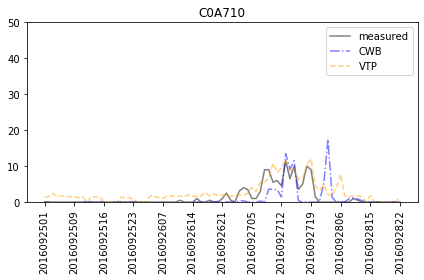

INFO:root:CWB data size:(23693, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 3678, 64
INFO:root:    Data dimension of testing data: 85, 64
INFO:root:CWB data size for evaluation:(85, 2)
INFO:root:{'id': 'C0A860', 'y_true_mean': 4.0961120174007615, 'y_true_var': 22.776658798435736, 'y_pred_mean': 3.3716607, 'y_pred_var': 2.5878036, 'rmse': 4.211944865214091, 'corr': 0.5303744029666356}
INFO:root:{'id': 'C0A860', 'y_true_mean': 2.5294117647058822, 'y_true_var': 39.127100840336176, 'y_pred_mean': 3.282331, 'y_pred_var': 3.2781682, 'rmse': 5.320723683985169, 'corr': 0.6307058228812764}


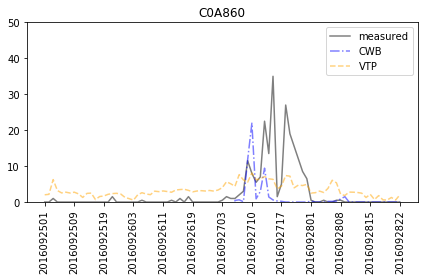

INFO:root:CWB data size:(23742, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2926, 64
INFO:root:    Data dimension of testing data: 88, 64
INFO:root:CWB data size for evaluation:(88, 2)
INFO:root:{'id': 'C0A870', 'y_true_mean': 3.02323991797676, 'y_true_var': 16.6726221147271, 'y_pred_mean': 2.4297953, 'y_pred_var': 2.0006115, 'rmse': 3.554592253432551, 'corr': 0.5528325783820895}
INFO:root:{'id': 'C0A870', 'y_true_mean': 1.4943181818181819, 'y_true_var': 10.956863897596648, 'y_pred_mean': 2.282792, 'y_pred_var': 2.9417603, 'rmse': 2.594958371930744, 'corr': 0.6786516151563702}


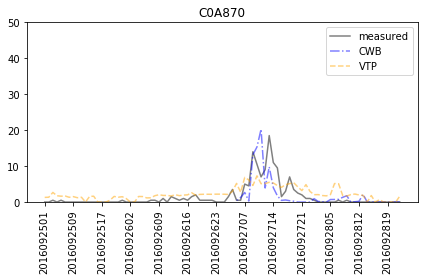

INFO:root:CWB data size:(23807, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2418, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A880', 'y_true_mean': 3.5628618693134824, 'y_true_var': 22.621408769492817, 'y_pred_mean': 2.9580941, 'y_pred_var': 4.198163, 'rmse': 3.997201875092728, 'corr': 0.5746771270545709}
INFO:root:{'id': 'C0A880', 'y_true_mean': 1.7777777777777777, 'y_true_var': 20.17478152309614, 'y_pred_mean': 3.0630615, 'y_pred_var': 5.355729, 'rmse': 3.712489063550465, 'corr': 0.6373193052807437}


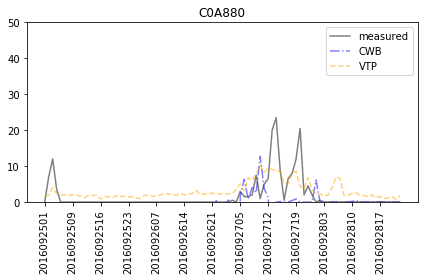

INFO:root:CWB data size:(23759, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2661, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0A890', 'y_true_mean': 3.4532130777903043, 'y_true_var': 23.374971815106978, 'y_pred_mean': 2.7862985, 'y_pred_var': 2.7884817, 'rmse': 4.148259502138342, 'corr': 0.5817306199678168}
INFO:root:{'id': 'C0A890', 'y_true_mean': 1.5561797752808988, 'y_true_var': 13.314989785495426, 'y_pred_mean': 2.587886, 'y_pred_var': 4.260612, 'rmse': 2.7715090164448237, 'corr': 0.7216204820597385}


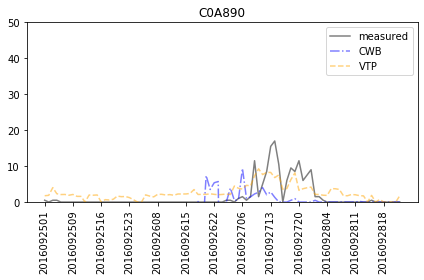

INFO:root:CWB data size:(23270, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2688, 64
INFO:root:    Data dimension of testing data: 86, 64
INFO:root:CWB data size for evaluation:(86, 2)
INFO:root:{'id': 'C0A920', 'y_true_mean': 3.4486607142857144, 'y_true_var': 17.562491692806624, 'y_pred_mean': 2.7280643, 'y_pred_var': 0.8296587, 'rmse': 3.904866099296935, 'corr': 0.47909392466456807}
INFO:root:{'id': 'C0A920', 'y_true_mean': 1.4069767441860466, 'y_true_var': 17.74418604651163, 'y_pred_mean': 2.6430202, 'y_pred_var': 0.69230807, 'rmse': 4.0568188025112555, 'corr': 0.47355561940889956}


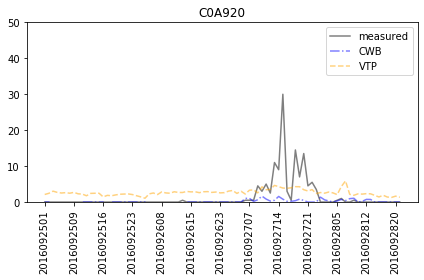

INFO:root:CWB data size:(23224, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2056, 64
INFO:root:    Data dimension of testing data: 86, 64
INFO:root:CWB data size for evaluation:(86, 2)
INFO:root:{'id': 'C0A940', 'y_true_mean': 3.3086089494163424, 'y_true_var': 18.11262171367176, 'y_pred_mean': 2.9966552, 'y_pred_var': 7.432816, 'rmse': 3.2509256708474816, 'corr': 0.6493662366933973}
INFO:root:{'id': 'C0A940', 'y_true_mean': 1.2965116279069768, 'y_true_var': 14.355164158686707, 'y_pred_mean': 2.8892555, 'y_pred_var': 5.23128, 'rmse': 3.3921276795722957, 'corr': 0.6064720674625825}


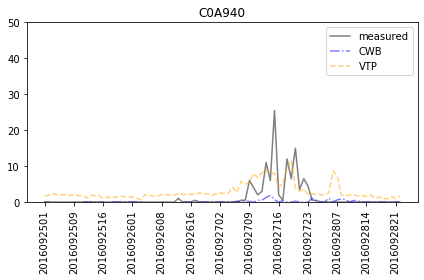

INFO:root:CWB data size:(22568, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1327, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0A950', 'y_true_mean': 3.0821401657874907, 'y_true_var': 15.065269021062784, 'y_pred_mean': 2.7062953, 'y_pred_var': 3.648659, 'rmse': 3.275927609136663, 'corr': 0.547285154248519}
INFO:root:{'id': 'C0A950', 'y_true_mean': 0.848314606741573, 'y_true_var': 6.871616445352404, 'y_pred_mean': 2.2575037, 'y_pred_var': 1.8581651, 'rmse': 2.502273248777446, 'corr': 0.6159282491430352}


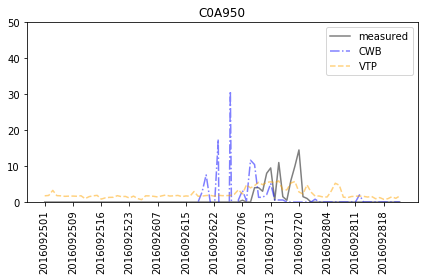

INFO:root:CWB data size:(24083, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1799, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A970', 'y_true_mean': 2.8287937743190663, 'y_true_var': 11.432574239427257, 'y_pred_mean': 2.3223717, 'y_pred_var': 2.9237864, 'rmse': 3.039273382022128, 'corr': 0.4644751283563065}
INFO:root:{'id': 'C0A970', 'y_true_mean': 0.2611111111111111, 'y_true_var': 0.512515605493134, 'y_pred_mean': 2.369888, 'y_pred_var': 3.725821, 'rmse': 2.62570254495841, 'corr': 0.6495835991408625}


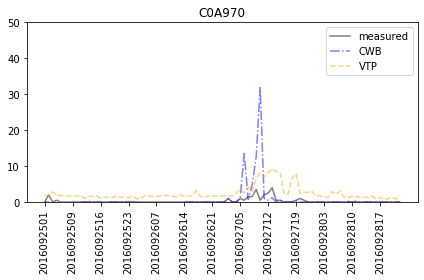

INFO:root:CWB data size:(23153, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1177, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0A980', 'y_true_mean': 4.1053525913339, 'y_true_var': 29.555217924042815, 'y_pred_mean': 3.2556565, 'y_pred_var': 4.350978, 'rmse': 4.636022101979859, 'corr': 0.5783076342640988}
INFO:root:{'id': 'C0A980', 'y_true_mean': 1.449438202247191, 'y_true_var': 12.483209908069473, 'y_pred_mean': 2.2623434, 'y_pred_var': 3.5825422, 'rmse': 2.4259079883411165, 'corr': 0.8046378586715686}


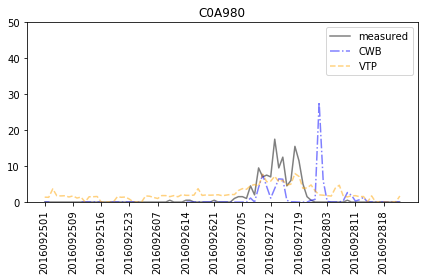

INFO:root:CWB data size:(23939, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1182, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A9A0', 'y_true_mean': 4.483502538071066, 'y_true_var': 42.074452412779294, 'y_pred_mean': 3.3311808, 'y_pred_var': 5.562591, 'rmse': 5.590669018003876, 'corr': 0.5778748258106506}
INFO:root:{'id': 'C0A9A0', 'y_true_mean': 1.35, 'y_true_var': 8.659831460674155, 'y_pred_mean': 2.2337866, 'y_pred_var': 4.4275365, 'rmse': 2.0162830817684227, 'corr': 0.788202569366705}


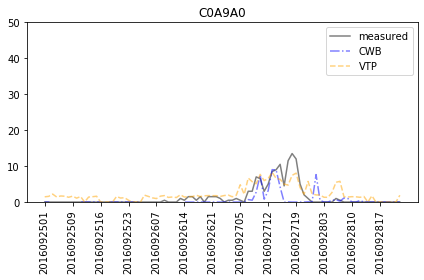

INFO:root:CWB data size:(24187, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1186, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A9B0', 'y_true_mean': 4.258853288364249, 'y_true_var': 36.07428864174874, 'y_pred_mean': 3.1260772, 'y_pred_var': 8.182292, 'rmse': 4.961468563054001, 'corr': 0.6083048028763216}
INFO:root:{'id': 'C0A9B0', 'y_true_mean': 2.1944444444444446, 'y_true_var': 22.352215980024972, 'y_pred_mean': 2.286044, 'y_pred_var': 7.0502577, 'rmse': 2.63343455776593, 'corr': 0.8902759343612403}


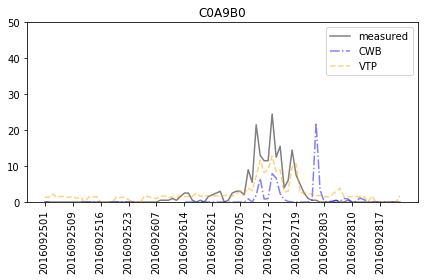

INFO:root:CWB data size:(23158, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1215, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A9C0', 'y_true_mean': 4.571604938271605, 'y_true_var': 43.69132649948141, 'y_pred_mean': 3.6702526, 'y_pred_var': 10.5168085, 'rmse': 5.240650541674759, 'corr': 0.6421857657879864}
INFO:root:{'id': 'C0A9C0', 'y_true_mean': 2.783333333333333, 'y_true_var': 35.623876404494425, 'y_pred_mean': 2.7781622, 'y_pred_var': 10.921362, 'rmse': 3.2645232029611253, 'corr': 0.9047358918871214}


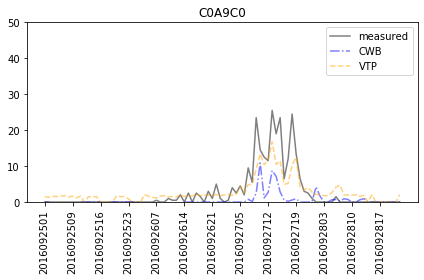

INFO:root:CWB data size:(24031, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1153, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0A9E0', 'y_true_mean': 4.379011274934952, 'y_true_var': 41.98773617435192, 'y_pred_mean': 3.4024956, 'y_pred_var': 11.314573, 'rmse': 5.2114279084637065, 'corr': 0.6210318058831702}
INFO:root:{'id': 'C0A9E0', 'y_true_mean': 1.7777777777777777, 'y_true_var': 15.775905118601752, 'y_pred_mean': 2.4176402, 'y_pred_var': 7.1803684, 'rmse': 2.1316023647610782, 'corr': 0.8809013830963246}


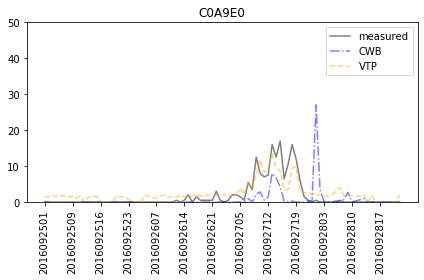

INFO:root:CWB data size:(23036, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1302, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0A9F0', 'y_true_mean': 4.675499231950845, 'y_true_var': 50.45438003497219, 'y_pred_mean': 3.1516933, 'y_pred_var': 3.7351506, 'rmse': 6.4183646716681, 'corr': 0.5566492443825786}
INFO:root:{'id': 'C0A9F0', 'y_true_mean': 2.146067415730337, 'y_true_var': 24.444330949948952, 'y_pred_mean': 2.3439646, 'y_pred_var': 4.1961865, 'rmse': 3.4024396890686224, 'corr': 0.8355083346743215}


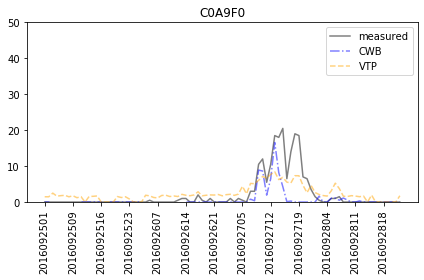

INFO:root:CWB data size:(24174, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1515, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0A9G0', 'y_true_mean': 4.244884488448845, 'y_true_var': 40.9281029423942, 'y_pred_mean': 2.8774488, 'y_pred_var': 3.4859452, 'rmse': 5.604572611701051, 'corr': 0.6216448973845781}
INFO:root:{'id': 'C0A9G0', 'y_true_mean': 2.657303370786517, 'y_true_var': 39.713610827374865, 'y_pred_mean': 2.270598, 'y_pred_var': 3.6074486, 'rmse': 5.001194540413164, 'corr': 0.756704451275086}


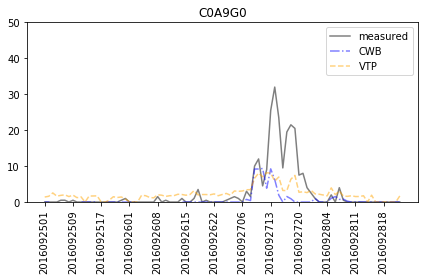

INFO:root:CWB data size:(23591, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1182, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0A9I1', 'y_true_mean': 4.419627749576988, 'y_true_var': 44.78523677917862, 'y_pred_mean': 3.0776408, 'y_pred_var': 4.5308905, 'rmse': 5.833847758653104, 'corr': 0.598551396342567}
INFO:root:{'id': 'C0A9I1', 'y_true_mean': 1.1123595505617978, 'y_true_var': 5.8054136874361655, 'y_pred_mean': 2.0665815, 'y_pred_var': 3.281663, 'rmse': 1.8495822239506685, 'corr': 0.7501301467851325}


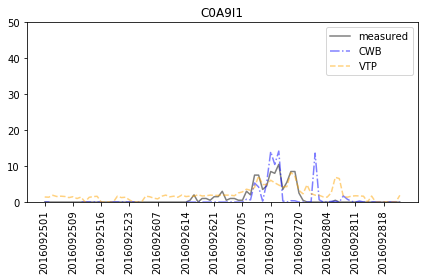

INFO:root:CWB data size:(23479, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2341, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0AC40', 'y_true_mean': 3.640965399401965, 'y_true_var': 34.68268436675131, 'y_pred_mean': 3.0464292, 'y_pred_var': 10.655768, 'rmse': 4.5778425453880836, 'corr': 0.6430884931029084}
INFO:root:{'id': 'C0AC40', 'y_true_mean': 6.258426966292135, 'y_true_var': 365.6483656792643, 'y_pred_mean': 3.0968113, 'y_pred_var': 16.665314, 'rmse': 16.829792743675753, 'corr': 0.6760914537208481}


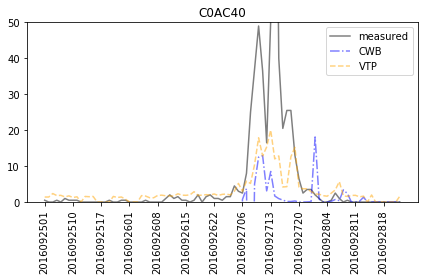

INFO:root:CWB data size:(24053, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1546, 64
INFO:root:    Data dimension of testing data: 88, 64
INFO:root:CWB data size for evaluation:(88, 2)
INFO:root:{'id': 'C0AC60', 'y_true_mean': 4.247089262613195, 'y_true_var': 39.91366466128249, 'y_pred_mean': 2.8007061, 'y_pred_var': 1.4432374, 'rmse': 6.000186874119586, 'corr': 0.48902992725617955}
INFO:root:{'id': 'C0AC60', 'y_true_mean': 1.6193181818181819, 'y_true_var': 19.873530564263312, 'y_pred_mean': 2.1144319, 'y_pred_var': 1.7235107, 'rmse': 3.9855334497164128, 'corr': 0.49249661690290625}


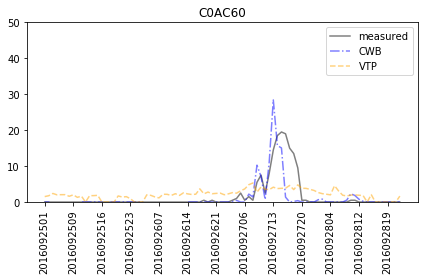

INFO:root:CWB data size:(23321, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1488, 64
INFO:root:    Data dimension of testing data: 88, 64
INFO:root:CWB data size for evaluation:(88, 2)
INFO:root:{'id': 'C0AC70', 'y_true_mean': 4.570900537634409, 'y_true_var': 47.26850705667769, 'y_pred_mean': 3.0351577, 'y_pred_var': 4.1255374, 'rmse': 5.998106027578796, 'corr': 0.6355200772228935}
INFO:root:{'id': 'C0AC70', 'y_true_mean': 2.0795454545454546, 'y_true_var': 27.3729101358412, 'y_pred_mean': 2.3357232, 'y_pred_var': 4.4935803, 'rmse': 3.7642591030292136, 'corr': 0.7912716756592437}


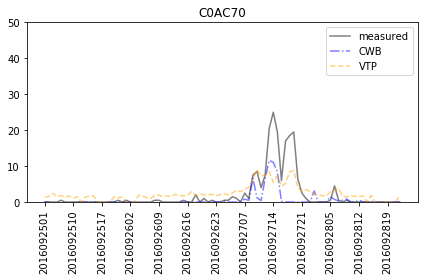

INFO:root:CWB data size:(23953, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1673, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0AC80', 'y_true_mean': 4.730723251643754, 'y_true_var': 52.563660780422175, 'y_pred_mean': 3.2880828, 'y_pred_var': 10.374456, 'rmse': 5.827819841074622, 'corr': 0.6644742025969695}
INFO:root:{'id': 'C0AC80', 'y_true_mean': 2.5388888888888888, 'y_true_var': 31.90015605493137, 'y_pred_mean': 2.614142, 'y_pred_var': 8.9934845, 'rmse': 3.298079195659785, 'corr': 0.8806782253966304}


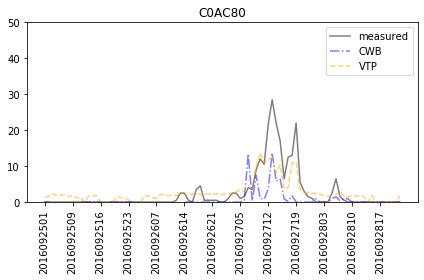

INFO:root:CWB data size:(24026, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1285, 64
INFO:root:    Data dimension of testing data: 89, 64
INFO:root:CWB data size for evaluation:(89, 2)
INFO:root:{'id': 'C0ACA0', 'y_true_mean': 4.143579766536965, 'y_true_var': 29.831977829496772, 'y_pred_mean': 3.0646567, 'y_pred_var': 4.695071, 'rmse': 4.628293172963244, 'corr': 0.602135990145686}
INFO:root:{'id': 'C0ACA0', 'y_true_mean': 1.2752808988764044, 'y_true_var': 10.056882022471898, 'y_pred_mean': 2.3515682, 'y_pred_var': 4.2399797, 'rmse': 2.0979155326250343, 'corr': 0.8424952029717101}


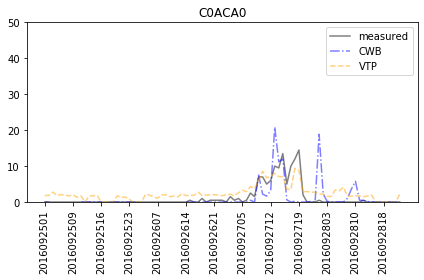

INFO:root:CWB data size:(23829, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 2145, 64
INFO:root:    Data dimension of testing data: 87, 64
INFO:root:CWB data size for evaluation:(87, 2)
INFO:root:{'id': 'C0AD00', 'y_true_mean': 3.0356643356643356, 'y_true_var': 15.363349663396537, 'y_pred_mean': 2.6182046, 'y_pred_var': 4.0601196, 'rmse': 3.1748331149454603, 'corr': 0.6022623633144368}
INFO:root:{'id': 'C0AD00', 'y_true_mean': 1.293103448275862, 'y_true_var': 14.445068163592639, 'y_pred_mean': 2.6505866, 'y_pred_var': 4.3797946, 'rmse': 3.277750498111705, 'corr': 0.6169526864509547}


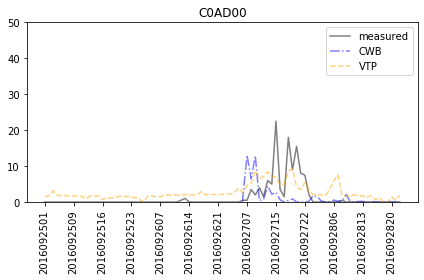

INFO:root:CWB data size:(23903, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1172, 64
INFO:root:    Data dimension of testing data: 87, 64
INFO:root:CWB data size for evaluation:(87, 2)
INFO:root:{'id': 'C0AD10', 'y_true_mean': 3.7610921501706485, 'y_true_var': 27.363454997478815, 'y_pred_mean': 2.6377254, 'y_pred_var': 2.305925, 'rmse': 4.616167781860197, 'corr': 0.6044667524756738}
INFO:root:{'id': 'C0AD10', 'y_true_mean': 1.3045977011494252, 'y_true_var': 9.885792568831873, 'y_pred_mean': 2.1115365, 'y_pred_var': 2.0120234, 'rmse': 2.6544690237722985, 'corr': 0.6076826503377935}


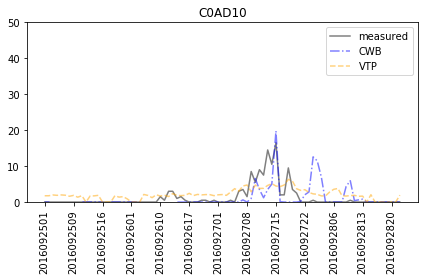

INFO:root:CWB data size:(22893, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1842, 64
INFO:root:    Data dimension of testing data: 88, 64
INFO:root:CWB data size for evaluation:(88, 2)
INFO:root:{'id': 'C0AD20', 'y_true_mean': 4.252171552660152, 'y_true_var': 38.860736726664086, 'y_pred_mean': 3.2050564, 'y_pred_var': 7.0592556, 'rmse': 5.101230616828705, 'corr': 0.6332995728529188}
INFO:root:{'id': 'C0AD20', 'y_true_mean': 3.5795454545454546, 'y_true_var': 45.292450365726275, 'y_pred_mean': 2.6376686, 'y_pred_var': 6.7782826, 'rmse': 4.541852296718355, 'corr': 0.9130773383597252}


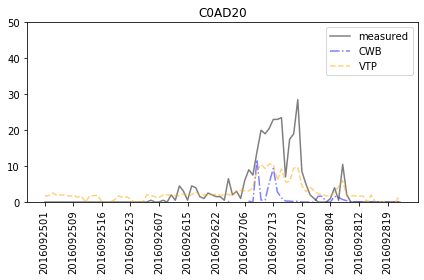

INFO:root:CWB data size:(24250, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1174, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0AD30', 'y_true_mean': 4.0651618398637135, 'y_true_var': 29.868512463129242, 'y_pred_mean': 3.4771771, 'y_pred_var': 10.835724, 'rmse': 4.351332674901853, 'corr': 0.6142191371168743}
INFO:root:{'id': 'C0AD30', 'y_true_mean': 1.3444444444444446, 'y_true_var': 9.23957553058678, 'y_pred_mean': 2.3804793, 'y_pred_var': 6.5830045, 'rmse': 1.8197746407034985, 'corr': 0.869166639483577}


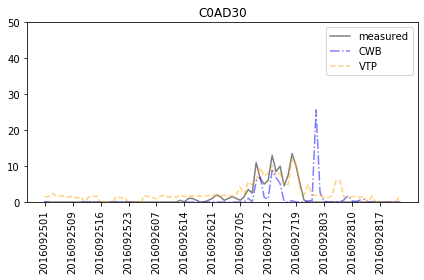

INFO:root:CWB data size:(24060, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1567, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0AD40', 'y_true_mean': 4.246968730057435, 'y_true_var': 37.357869158025515, 'y_pred_mean': 4.0739474, 'y_pred_var': 19.463186, 'rmse': 5.127419902783793, 'corr': 0.5664126476022062}
INFO:root:{'id': 'C0AD40', 'y_true_mean': 1.488888888888889, 'y_true_var': 17.353807740324594, 'y_pred_mean': 2.7843056, 'y_pred_var': 8.336537, 'rmse': 3.139632210310031, 'corr': 0.7239561061929009}


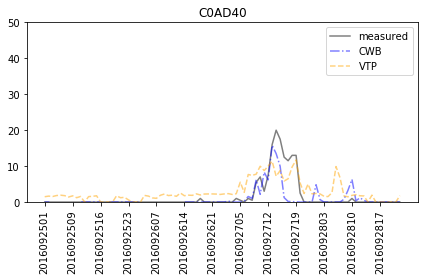

INFO:root:CWB data size:(23947, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1377, 64
INFO:root:    Data dimension of testing data: 90, 64
INFO:root:CWB data size for evaluation:(90, 2)
INFO:root:{'id': 'C0AD50', 'y_true_mean': 3.9462599854756717, 'y_true_var': 30.32995874921887, 'y_pred_mean': 3.2128558, 'y_pred_var': 5.279701, 'rmse': 4.562369524880479, 'corr': 0.6051608994593807}
INFO:root:{'id': 'C0AD50', 'y_true_mean': 1.0555555555555556, 'y_true_var': 6.2665418227216, 'y_pred_mean': 2.3655784, 'y_pred_var': 3.722762, 'rmse': 2.289111782434297, 'corr': 0.6658013513908544}


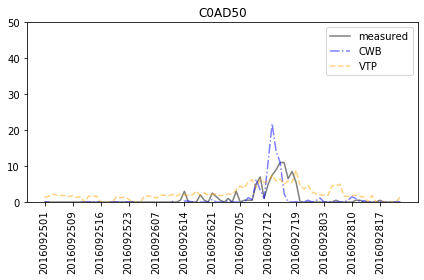

INFO:root:CWB data size:(23441, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1561, 64
INFO:root:    Data dimension of testing data: 60, 64
INFO:root:CWB data size for evaluation:(60, 2)
INFO:root:{'id': 'C0AG90', 'y_true_mean': 4.736066623959001, 'y_true_var': 60.841191954532505, 'y_pred_mean': 3.475246, 'y_pred_var': 8.95339, 'rmse': 6.534604095603505, 'corr': 0.6138377683300823}
INFO:root:{'id': 'C0AG90', 'y_true_mean': 3.075, 'y_true_var': 48.93072033898305, 'y_pred_mean': 3.0081663, 'y_pred_var': 9.146727, 'rmse': 5.028129755107167, 'corr': 0.7623124400704875}


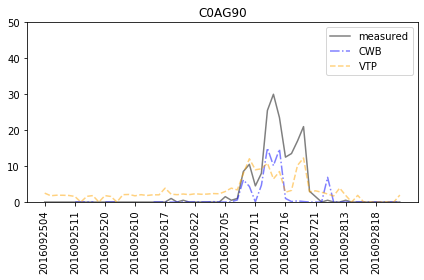

INFO:root:CWB data size:(23404, 2)
INFO:root:    Filter y: 1.0
INFO:root:    Data dimension of training data: 1994, 64
INFO:root:    Data dimension of testing data: 84, 64
INFO:root:CWB data size for evaluation:(84, 2)
INFO:root:{'id': 'C0AH00', 'y_true_mean': 3.7113841524573723, 'y_true_var': 30.421802097209838, 'y_pred_mean': 3.6805317, 'y_pred_var': 19.470078, 'rmse': 4.50383099465291, 'corr': 0.6081249324030169}
INFO:root:{'id': 'C0AH00', 'y_true_mean': 2.9523809523809526, 'y_true_var': 39.74469305794603, 'y_pred_mean': 3.1057048, 'y_pred_var': 15.126818, 'rmse': 4.297856038411537, 'corr': 0.7374961730877375}


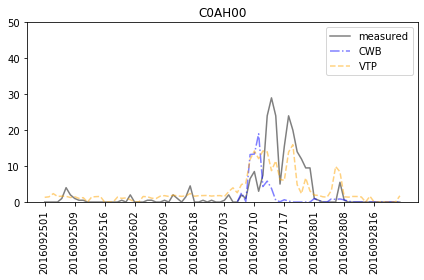

In [72]:
for s in stdids:
    evaluate_onestation(s, iotab, x_full, cwb, yth=1.0,ts0=2016092500, ts1=2016092824)